In [0]:
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn
import sklearn
from sklearn.datasets import make_blobs,make_moons
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model,ensemble
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans,MeanShift,AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import silhouette_score,calinski_harabaz_score
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances

In [0]:
#read data
train=pandas.read_csv("/content/drive/My Drive/MontrealLocalTV/data.csv")
train=pandas.DataFrame(train)
test=pandas.read_csv("/content/drive/My Drive/MontrealLocalTV/test.csv")
test=pandas.DataFrame(test)

In [0]:
#train and test data information
print("Train data information is : \n")
print(train.info())

print("\n Test data information is : \n")
print(test.info())

Train data information is : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
Unnamed: 0                                616656 non-null int64
Episode                                   616656 non-null object
Station                                   616656 non-null object
Channel Type                              616656 non-null object
Season                                    616656 non-null object
Year                                      616656 non-null int64
Date                                      616656 non-null object
Day of week                               616656 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616656 non-null int64
Name of show                              616656 non-null object
Name of episode                           394077 non-null object
Genre            

In [0]:
#train and test data sum of innull in each feature
print("train data : \n ",train.isnull().sum())
print("\n test data : \n ",test.isnull().sum())

train data : 
  Unnamed: 0                                     0
Episode                                        0
Station                                        0
Channel Type                                   0
Season                                         0
Year                                           0
Date                                           0
Day of week                                    0
Start_time                                    43
End_time                                      43
Length                                         0
Name of show                                   0
Name of episode                           222579
Genre                                          0
First time or rerun                            0
# of episode in the season                     0
Movie?                                         0
Game of the Canadiens during episode?          0
Market Share_total                             0
Temperature in Montreal during episode     83344
dtyp

In [0]:
#label Decribe
train["Market Share_total"].describe()

count    616656.000000
mean          3.011562
std           4.919562
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Market Share_total, dtype: float64

Columns For Delete ---->

"Unnamed: 0"

"Episode" Bsc it is equal to "Name of show"

"Start_time" and "End_time" Bsc we have "length" and it is the length of them

"Name of episode" Bsc it has a lot of null value

"Temperature in Montreal during episode" Bsc it has a lot of null value and I thinks it's not important

**********************************************

Column For Label ---->
"Market Share_total"

In [0]:
for col in train.columns:
  print("\n\n",col)
  print(train[col].value_counts())

In [0]:
print("shape of train data before delete columns is : ", train.shape)
print("shape of test data before delete columns is : ", test.shape)

train_new=train.drop(columns=["Unnamed: 0","Episode","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])
test_new=test.drop(columns=["Unnamed: 0","Episode","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])

print("shape of train data after delete columns is : ", train_new.shape)
print("shape of test data after delete columns is : ", test_new.shape)

shape of train data before delete columns is :  (616656, 20)
shape of test data before delete columns is :  (154165, 19)
shape of train data after delete columns is :  (616656, 14)
shape of test data after delete columns is :  (154165, 13)


In [0]:
#change object feature to numeric in train and test data
for col in train_new.columns:
  if col != "Market Share_total" and col != "Year" and col != "Length":
    train_new[col] = pandas.factorize(train_new[col])[0]

for col in test_new.columns:
  if col != "Market Share_total" and col != "Year" and col != "Length":
    test_new[col] = pandas.factorize(test_new[col])[0]

In [0]:
print("the numeric columns in train data are : \n",train_new.select_dtypes(include=[numpy.number]).dtypes)
print("\n\n")
print("the object columns in train data are : \n",train_new.select_dtypes(exclude=[numpy.number]).dtypes)

the numeric columns in train data are : 
 Station                                    int64
Channel Type                               int64
Season                                     int64
Year                                       int64
Date                                       int64
Day of week                                int64
Length                                     int64
Name of show                               int64
Genre                                      int64
First time or rerun                        int64
# of episode in the season                 int64
Movie?                                     int64
Game of the Canadiens during episode?      int64
Market Share_total                       float64
dtype: object



the object columns in train data are : 
 Series([], dtype: object)


In [0]:
print("the numeric columns in test data are : \n",test_new.select_dtypes(include=[numpy.number]).dtypes)
print("\n\n")
print("the numeric columns in test data are : \n",test_new.select_dtypes(exclude=[numpy.number]).dtypes)

the numeric columns in test data are : 
 Station                                  int64
Channel Type                             int64
Season                                   int64
Year                                     int64
Date                                     int64
Day of week                              int64
Length                                   int64
Name of show                             int64
Genre                                    int64
First time or rerun                      int64
# of episode in the season               int64
Movie?                                   int64
Game of the Canadiens during episode?    int64
dtype: object



the numeric columns in test data are : 
 Series([], dtype: object)


In [0]:
#corolation between label and other feature
numeric_feature=train_new.select_dtypes(include=[numpy.number])
corolation=numeric_feature.corr()
corolation["Market Share_total"].sort_values()[:]

Channel Type                            -0.572825
Station                                 -0.388944
Genre                                   -0.089270
Name of show                            -0.081997
# of episode in the season              -0.056575
Day of week                             -0.022038
Year                                    -0.019339
Date                                    -0.017163
Season                                  -0.006222
Game of the Canadiens during episode?   -0.004704
First time or rerun                      0.002339
Length                                   0.008794
Movie?                                   0.025719
Market Share_total                       1.000000
Name: Market Share_total, dtype: float64

In [0]:
#label
label = train_new.pop("Market Share_total")

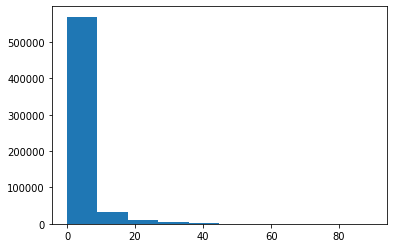

In [0]:
#histogram of label
plt.hist(label)
plt.show()

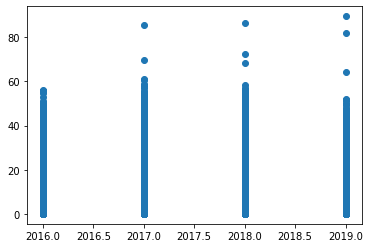

In [0]:
plt.scatter(train_new["Year"],label)
plt.show()

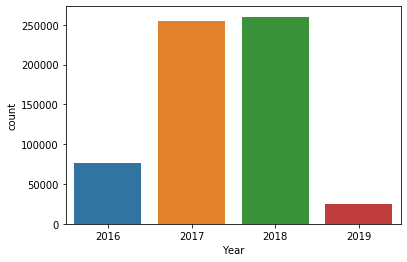

In [0]:
seaborn.countplot(train_new["Year"])

In [0]:
#the head of orginal data
train.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [0]:
#the head of data after delete columns and numeric
train_new.head()

,Station,Channel Type,Season,Year,Date,Day of week,Length,Name of show,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?
0,0,0,0,2016,0,0,8,0,0,0,0,0,0
1,0,0,0,2016,0,0,2,1,1,0,0,0,0
2,0,0,0,2016,0,0,2,2,2,0,0,0,0
3,0,0,0,2016,0,0,4,3,3,0,0,0,0
4,0,0,0,2016,0,0,2,4,4,0,0,0,0


In [0]:
#the head of data after normal
Standard_Scaler = sklearn.preprocessing.StandardScaler()
train_normalizerd = Standard_Scaler.fit_transform(train_new)
train_normalizerd=pandas.DataFrame(train_normalizerd,columns=train_new.columns, index=train_new.index)
train_normalizerd.head()

,Station,Channel Type,Season,Year,Date,Day of week,Length,Name of show,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?
0,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,0.903778,-0.937988,-1.404569,-0.169323,-0.132593,-0.101491,-0.289909
1,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.937394,-1.261063,-0.169323,-0.132593,-0.101491,-0.289909
2,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.936800,-1.117557,-0.169323,-0.132593,-0.101491,-0.289909
3,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,0.150007,-0.936205,-0.974050,-0.169323,-0.132593,-0.101491,-0.289909
4,-1.704273,-2.576988,-0.996422,-1.838599,-1.74949,-1.49351,-0.226878,-0.935611,-0.830544,-0.169323,-0.132593,-0.101491,-0.289909
